# このノートブックでやること

- 実験データを用いて学習する
  - data/csv/tek0001ALL.csv
  - data/csv/tek0000ALL.csv


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate

# 実験データの中身を確認する


In [2]:
path0 = "../data/csv/tek0000ALL.csv"
path1 = "../data/csv/tek0001ALL.csv"


with open(path0, encoding="utf-8", errors="replace") as f:
    for i, line in enumerate(f, start=1):
        if i > 30:  # 必要に応じて増やす
            break
        print(f"{i:>5}: {line.rstrip()}")

    1: Model,MDO3024
    2: Firmware Version,1.30
    3: 
    4: Waveform Type,ANALOG,
    5: Point Format,Y,
    6: Horizontal Units,s,
    7: Horizontal Scale,0.0002,
    8: Horizontal Delay,0.000741,
    9: Sample Interval,4e-10,
   10: Record Length,1e+07,
   11: Gating,0.0% to 100.0%,
   12: Probe Attenuation,10,1
   13: Vertical Units,A,V
   14: Vertical Offset,0,0
   15: Vertical Scale,0.5,2
   16: Vertical Position,-2.82,0.04
   17: ,,
   18: ,,
   19: ,,
   20: Label,,
   21: TIME,CH1,CH2
   22: -1.2590000e-03,-0.07,-0.08
   23: -1.2589996e-03,-0.09,-0.08
   24: -1.2589992e-03,-0.09,-0.08
   25: -1.2589988e-03,-0.07,-0.08
   26: -1.2589984e-03,-0.09,-0.08
   27: -1.2589980e-03,-0.09,-0.16
   28: -1.2589976e-03,-0.09,-0.08
   29: -1.2589972e-03,-0.09,-0.08
   30: -1.2589968e-03,-0.09,0


In [3]:
with open(path1, encoding="utf-8", errors="replace") as f:
    for i, line in enumerate(f, start=1):
        if i > 30:  # 必要に応じて増やす
            break
        print(f"{i:>5}: {line.rstrip()}")

    1: Model,MDO3024,
    2: Firmware Version,1.3,
    3: ,,
    4: Waveform Type,ANALOG,
    5: Point Format,Y,
    6: Horizontal Units,s,
    7: Horizontal Scale,0.0002,
    8: Horizontal Delay,0.000741,
    9: Sample Interval,2e-09,
   10: Record Length,1e+06,
   11: Gating,0.0% to 100.0%,
   12: Probe Attenuation,10,1
   13: Vertical Units,A,V
   14: Vertical Offset,0,0
   15: Vertical Scale,0.5,2
   16: Vertical Position,-2.82,0.04
   17: ,,
   18: ,,
   19: ,,
   20: Label,,
   21: TIME,CH1,CH2
   22: -2.59E-04,-0.09,-0.08
   23: -2.59E-04,-0.11,-0.08
   24: -2.59E-04,-0.11,-0.08
   25: -2.59E-04,-0.09,-0.08
   26: -2.59E-04,-0.11,-0.16
   27: -2.59E-04,-0.09,-0.08
   28: -2.59E-04,-0.09,-0.08
   29: -2.59E-04,-0.09,-0.08
   30: -2.59E-04,-0.11,-0.08


In [4]:
# 18行目まではヘッダーなのでスキップ
# ch1: i_L, ch2: v_C
df1 = pd.read_csv("../data/csv/tek0001ALL.csv", skiprows=20)

print(len(df1))
df1.head()

1000000


,TIME,CH1,CH2
0,-0.000259,-0.09,-0.08
1,-0.000259,-0.11,-0.08
2,-0.000259,-0.11,-0.08
3,-0.000259,-0.09,-0.08
4,-0.000259,-0.11,-0.16


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   TIME    1000000 non-null  float64
 1   CH1     1000000 non-null  float64
 2   CH2     1000000 non-null  float64
dtypes: float64(3)
memory usage: 22.9 MB


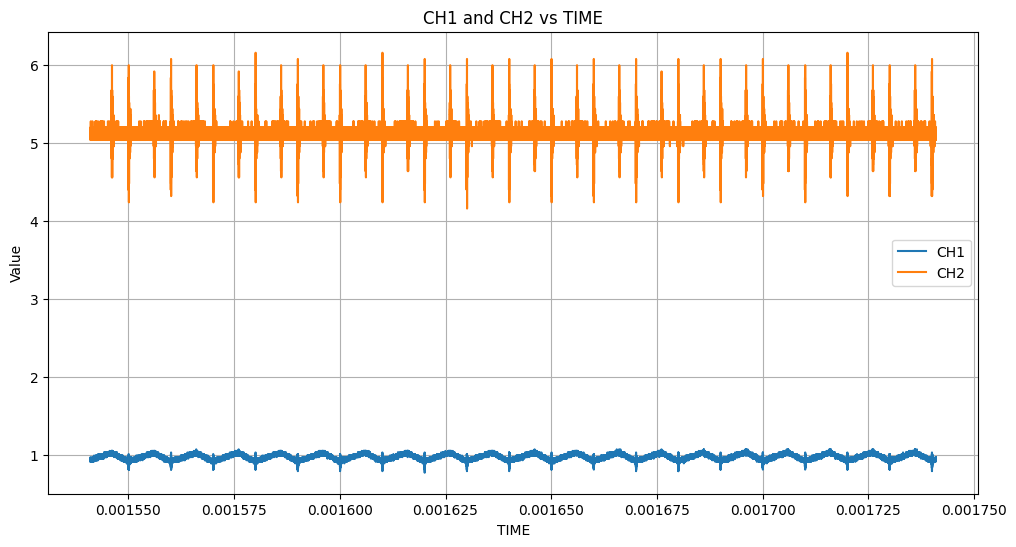

In [6]:
df1 = df1.tail(int(len(df1) * 0.1))

plt.figure(figsize=(12, 6))
plt.plot(df1["TIME"], df1["CH1"], label="CH1")
plt.plot(df1["TIME"], df1["CH2"], label="CH2")
plt.xlabel("TIME")
plt.ylabel("Value")
plt.title("CH1 and CH2 vs TIME")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df0 = pd.read_csv("../data/csv/tek0000ALL.csv", skiprows=20)

print(len(df0))
df0.head()

10000000


,TIME,CH1,CH2
0,-0.001259,-0.07,-0.08
1,-0.001259,-0.09,-0.08
2,-0.001259,-0.09,-0.08
3,-0.001259,-0.07,-0.08
4,-0.001259,-0.09,-0.08


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   TIME    float64
 1   CH1     float64
 2   CH2     float64
dtypes: float64(3)
memory usage: 228.9 MB


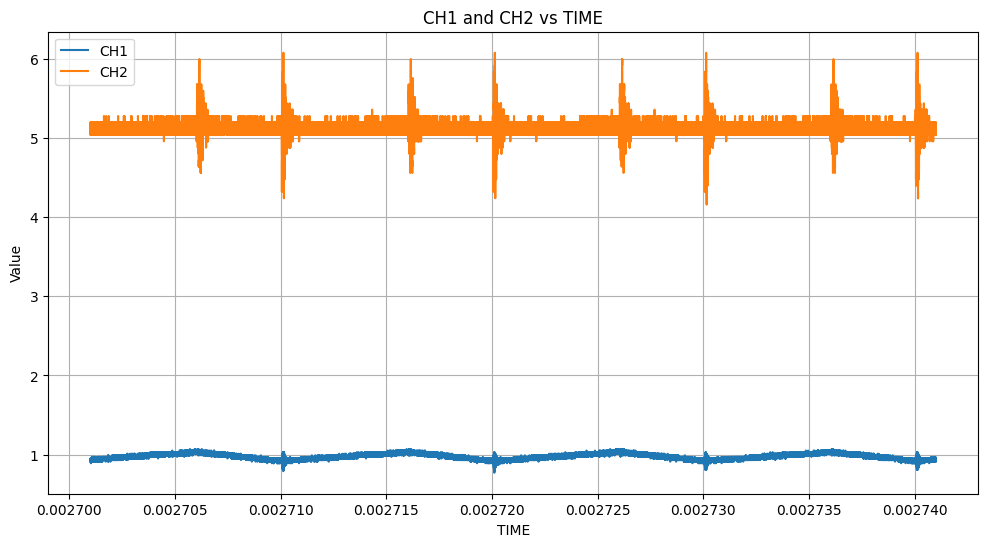

In [9]:
df0 = df0.tail(int(len(df0) * 0.01))

plt.figure(figsize=(12, 6))
plt.plot(df0["TIME"], df0["CH1"], label="CH1")
plt.plot(df0["TIME"], df0["CH2"], label="CH2")
plt.xlabel("TIME")
plt.ylabel("Value")
plt.title("CH1 and CH2 vs TIME")
plt.legend()
plt.grid(True)
plt.show()


# TIME 列に規則性はあるのか？


In [10]:
t = df1["TIME"].to_numpy()
t = t[np.isfinite(t)]

dt = np.diff(t)
dt = dt[np.isfinite(dt)]

mean = float(np.mean(dt))
print(f"{mean=}")

mean=1.9999999999999985e-09


In [11]:
unique = sorted(set(dt))
print(f"{unique=}")


unique=[np.float64(1.99999999981465e-09), np.float64(2.0000000000314905e-09)]


In [12]:
v1, v2 = float(unique[0]), float(unique[-1])


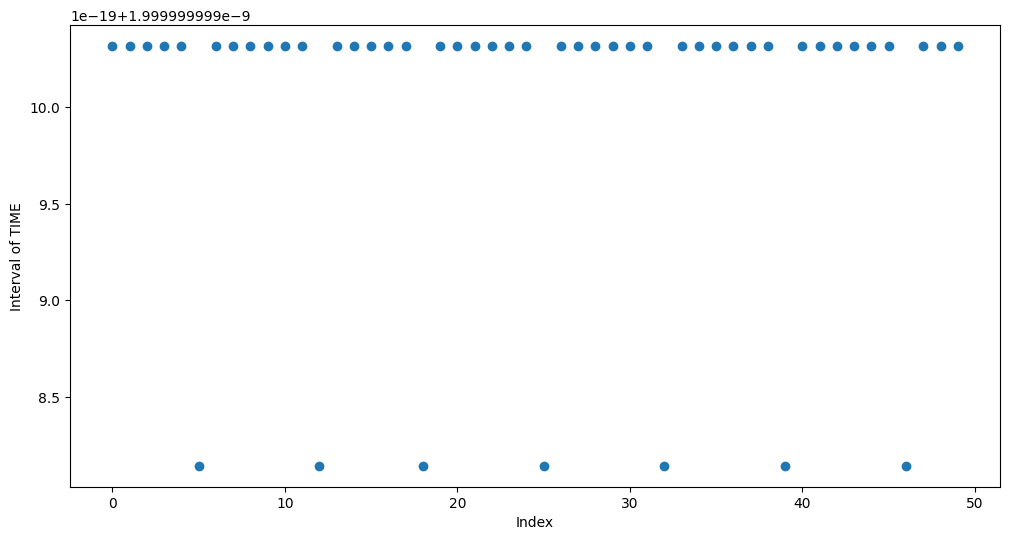

In [13]:
# ch1 = df1["CH1"].to_numpy()
# ch2 = df1["CH2"].to_numpy()

d = []
for x in dt:
    if x == v1:
        d.append(v1)
    elif x == v2:
        d.append(v2)
    else:
        d.append(-1)


plt.figure(figsize=(12, 6))
start = len(d) * 2 // 3
end = start + 50

ax1 = plt.gca()
# ax2 = ax1.twinx()

# d is TIME interval
ax1.scatter(
    range(end - start), d[start:end], marker="o", color="C0", label="Interval of TIME"
)
ax1.set_ylabel("Interval of TIME")
ax1.set_xlabel("Index")

# ch1, ch2 on right y-axis
# ax2.plot(range(100), ch1[:100], color="C1", label="CH1")
# ax2.plot(range(100), ch2[:100], color="C2", label="CH2")
# ax2.set_ylabel("CH1 / CH2")

# Legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.show()


In [14]:
t = df0["TIME"].to_numpy()
t = t[np.isfinite(t)]

dt = np.diff(t)
dt = dt[np.isfinite(dt)]

mean = float(np.mean(dt))
print(f"{mean=}")

mean=3.999999999999997e-10


In [15]:
unique = sorted(set(dt))
print(f"{unique=}")


unique=[np.float64(3.999999997027215e-10), np.float64(4.0000000013640236e-10)]


In [16]:
v1, v2 = float(unique[0]), float(unique[-1])


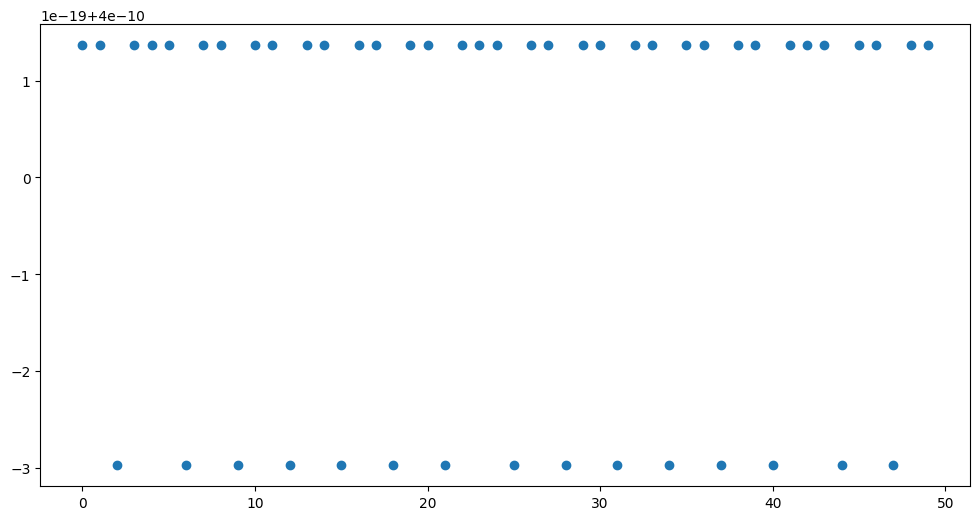

In [17]:
d = []
for x in dt:
    if x == v1:
        d.append(v1)
    elif x == v2:
        d.append(v2)
    else:
        d.append(-1)


plt.figure(figsize=(12, 6))
start = len(d) // 3
end = start + 50


# d is TIME interval
plt.scatter(
    range(end - start), d[start:end], marker="o", color="C0", label="Interval of TIME"
)

plt.show()


# 等間隔に整形

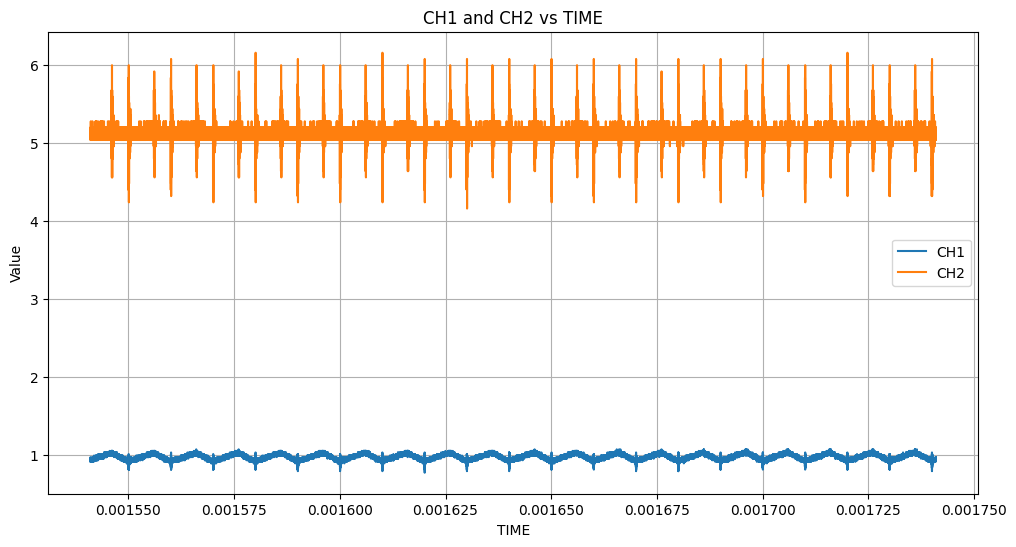

In [18]:
# 参考: https://qiita.com/shiba54/items/0511d3ba978909590b3d
t = df1["TIME"].to_numpy()
ch1 = df1["CH1"].to_numpy()
ch2 = df1["CH2"].to_numpy()

# 等間隔軸を作る（例：最初〜最後をN点で）
t_uniform = np.linspace(t.min(), t.max(), num=len(t))

# 線形補間関数を作成
f1 = interpolate.interp1d(t, ch1, kind='linear', fill_value="extrapolate")
f2 = interpolate.interp1d(t, ch2, kind='linear', fill_value="extrapolate")

# 等間隔データを生成
ch1_uniform = f1(t_uniform)
ch2_uniform = f2(t_uniform)


plt.figure(figsize=(12, 6))
plt.plot(t_uniform, ch1_uniform, label="CH1")
plt.plot(t_uniform, ch2_uniform, label="CH2")
plt.xlabel("TIME")
plt.ylabel("Value")
plt.title("CH1 and CH2 vs TIME")
plt.legend()
plt.grid(True)
plt.show()
